# <center> Task 2. Spam Filter </center>

<u>Golden Task: Spam filter </u>

Dataset : https://www.kaggle.com/datasets/jackksoncsie/spam-email-dataset

Objective: Build a spam filter using NLP and machine learning to identify and filter out spam emails.

---
1. Importing Libraries
2. Data cleaning
3. Data Preprocessing
4. Spiltting Data
5. Spam Filter using Machine Learning
6. Spam Filter using NLP

---

## Importing Libraries

In [753]:
# General Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For Data Preprocessing

from sklearn.naive_bayes import MultinomialNB

# from sklearn import feature_selection
from sklearn import model_selection

#sklearn modules for Model Evaluation & Improvement
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, fbeta_score
from sklearn.model_selection import cross_val_score, GridSearchCV, ShuffleSplit, KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor

# from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score

import warnings
warnings.filterwarnings('ignore')

In [754]:
df = pd.read_csv(r'emails.csv')

In [755]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


This dataset contains a collection of email text messages, labeled as either spam or not spam. <br>Here "1" indicates that the email is spam, and "0" indicates that it is not spam.

## Data Cleaning

In [756]:
df.shape

(5728, 2)

In [757]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [758]:
# Chceck null values
df.isnull().sum()

text    0
spam    0
dtype: int64

In [759]:
df.dtypes

text    object
spam     int64
dtype: object

In [760]:
# Spam Column
print('Unique values in spam column:',df['spam'].unique())

Unique values in spam column: [1 0]


In [761]:
df['spam'].value_counts()

spam
0    4360
1    1368
Name: count, dtype: int64

- Spam and Non-Spam Mail Count.

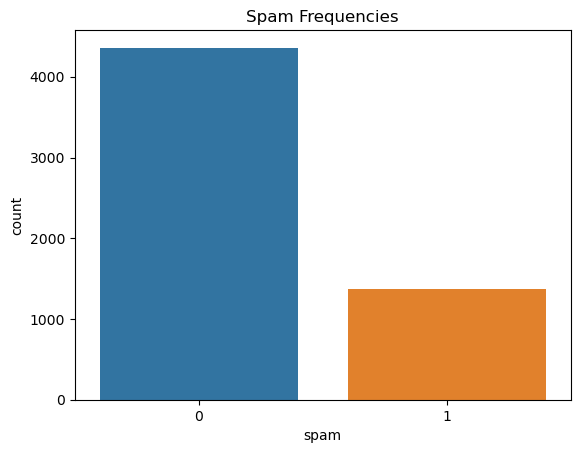

In [762]:
plt.figure(dpi=100)
sns.countplot(x ='spam', data= df)
plt.title("Spam Frequencies")
plt.show()

- Pie Chart for Spam and Non-spam Distribution.

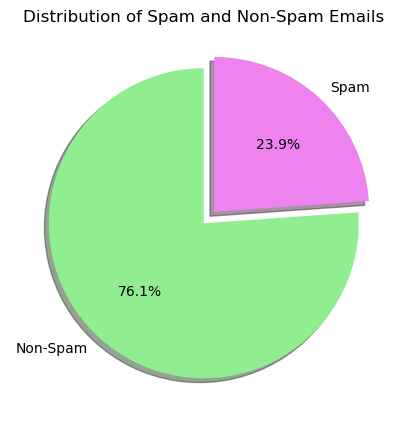

In [763]:
plt.figure(figsize=(5, 6))

spam_values = df['spam'].value_counts()
explode = (0, 0.1)

plt.pie(spam_values, explode=explode, labels=['Non-Spam', 'Spam'], colors = ['lightgreen', 'violet'], 
            autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Distribution of Spam and Non-Spam Emails')
plt.show()

## Data Preprocessing

The data processing includes taking following measures into considerations:
1. Remove extra words such as subject and re
2. Remove punctuations.
3. Remove stopwords
4. Remove extra spaces between words.

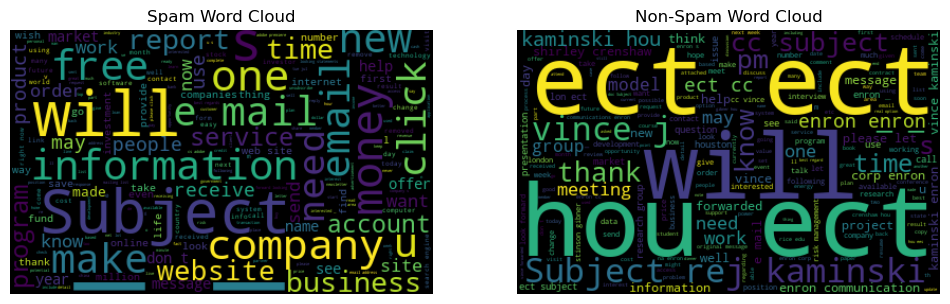

In [764]:
from wordcloud import WordCloud

fig,ax = plt.subplots(1,2, figsize=(12,8))

# Word Cloud for Spam
word_spam = ' '.join((df[df['spam'] == 1]['text']))
word_cloud_spam = WordCloud(width=400, height=250, random_state=21, max_font_size=110).generate(word_spam)
ax[0].imshow(word_cloud_spam, interpolation='bilinear')
ax[0].axis('off')
ax[0].set_title('Spam Word Cloud')

# Word Cloud for Non-Spam
word_non_spam = ' '.join((df[df['spam'] == 0]['text']))
word_cloud_non_spam = WordCloud(width=400, height=250, random_state=21, max_font_size=110).generate(word_non_spam)
ax[1].imshow(word_cloud_non_spam, interpolation='bilinear')
ax[1].axis('off')
ax[1].set_title('Non-Spam Word Cloud')

plt.show()

In [765]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import string

# Create a set of stopwords 
stopwords_set = set(stopwords.words('english'))

def cleaned_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove 'subject'
    text = re.sub('subject', ' ', text)

    # Remove 're'
    text = re.sub(r'\bre\b', ' ', text)

    # Remove punctuations and multiple spaces 
    text = re.sub(' +', ' ', ''.join([char if char not in string.punctuation else ' ' for char in text]))

    # Tokenization
    words = word_tokenize(text)

    # Remove stopwords 
    words = [word for word in words if word.lower() not in stopwords_set]

    # Remove single character
    words = [word for word in words if len(word) > 1]

    # Join the filtered words to form a clean text
    return ' '.join(words)

In [766]:
df['text'] = df['text'].apply(cleaned_text)
df

,text,spam
0,naturally irresistible corporate identity lt r...,1
1,stock trading gunslinger fanny merrill muzo co...,1
2,unbelievable new homes made easy im wanting sh...,1
3,color printing special request additional info...,1
4,money get software cds software compatibility ...,1
...,...,...
5723,research development charges gpg forwarded shi...,0
5724,receipts visit jim thanks invitation visit lsu...,0
5725,enron case study update wow day super thank mu...,0
5726,interest david please call shirley crenshaw as...,0


## Splitting Data

In [767]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [768]:
# Splitting the data 
x_data = df['text']

# Convert text data to a matrix of token counts.
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(x_data)

In [769]:
y = df['spam']

In [770]:
# Splitting the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [771]:
print('Shape of x and y training data:', x_train.shape , y_train.shape)
print('Shape of x and y testing data:', x_test.shape , y_test.shape)

Shape of x and y training data: (4582, 37153) (4582,)
Shape of x and y testing data: (1146, 37153) (1146,)


#  <center> <div style = 'background-color:pink'> Spam Filter using Machine Learning </center></div>

In [772]:
# Classification Algorithms
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#sklearn modules for Model Evaluation & Improvement
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score, GridSearchCV, ShuffleSplit, KFold

# from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss

Algorithm to be used:
1. RandomForest Classifier
2. Logistic Regression
3. Support Vector Machine Classifier

In [773]:
# RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=20, random_state = 0)
rfc.fit(x_train, y_train)

y_pred_rfc = rfc.predict(x_test)

In [774]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

y_pred_log_reg = log_reg.predict(x_test)

In [775]:
# SupportVectorClassifier
svc = SVC()
svc.fit(x_train, y_train)

y_pred_svc = svc.predict(x_test)

In [776]:
# Classification report

print('Classification Report for RandomForestClassifier:\n',classification_report(y_test,y_pred_rfc))
print('*'*60)
print('Classification Report for Logistic Regression:\n',classification_report(y_test,y_pred_log_reg))
print('*'*60)
print('Classification Report for SupportVectorClassifier:\n',classification_report(y_test,y_pred_svc))

Classification Report for RandomForestClassifier:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       858
           1       0.98      0.85      0.91       288

    accuracy                           0.96      1146
   macro avg       0.97      0.92      0.94      1146
weighted avg       0.96      0.96      0.96      1146

************************************************************
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       858
           1       0.99      0.99      0.99       288

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146

************************************************************
Classification Report for SupportVectorClassifier:
               precision    recall  f1-score   support

           0      

In [777]:
# Model Evaluation (Accuracy, Precision and Recall)
models = [rfc, log_reg, svc]
for model in models:
    y_pred = model.predict(x_test)
    
    accuracy = accuracy_score(y_test,y_pred)*100
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)

    print(f'Metrics for {type(model).__name__}:')
    print(f' Accuracy:  {accuracy} %')
    print(f' Precision: {precision}')
    print(f' Recall:    {recall}')
    print('*'*60)

Metrics for RandomForestClassifier:
 Accuracy:  95.81151832460732 %
 Precision: 0.9838709677419355
 Recall:    0.8472222222222222
************************************************************
Metrics for LogisticRegression:
 Accuracy:  99.3891797556719 %
 Precision: 0.9895470383275261
 Recall:    0.9861111111111112
************************************************************
Metrics for SVC:
 Accuracy:  97.90575916230367 %
 Precision: 0.9888888888888889
 Recall:    0.9270833333333334
************************************************************


Logistic Regression outperforms the other two techniques used on the dataset, with a recall of 0.984 and an accuracy of 98.69%.

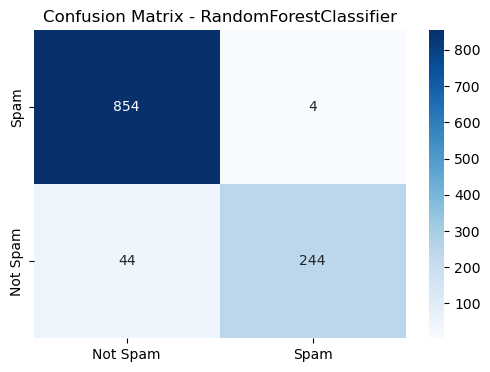

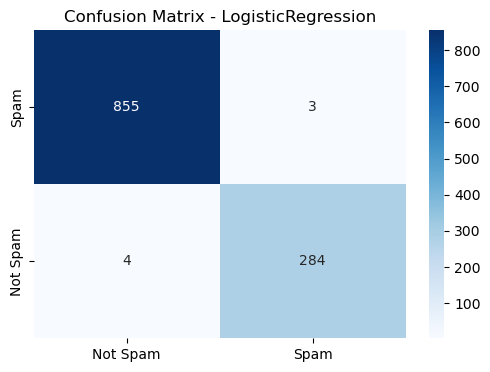

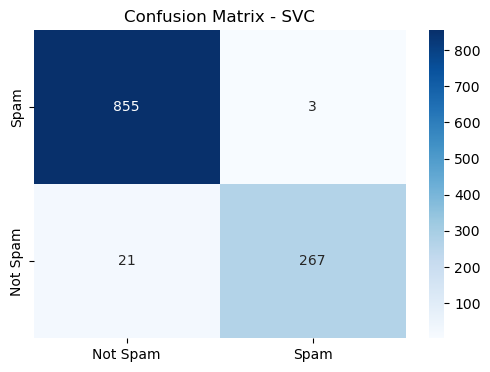

In [778]:
# Confusion Matrix
models = [rfc, log_reg, svc]

for model in models:
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)

    fig, ax = plt.subplots(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Spam', 'Not Spam'])
    plt.title(f'Confusion Matrix - {type(model).__name__}')
    plt.show()

#  <center> <div style = 'background-color:pink'> Spam Filter using Natural Language Processing (NLP) </center></div>

In [779]:
from sklearn.naive_bayes import MultinomialNB

In [780]:
nb_model = MultinomialNB()
nb_model.fit(x_train,y_train)

MultinomialNB()

In [781]:
y_pred = nb_model.predict(x_test)

- Words Contributing to spam Visual.

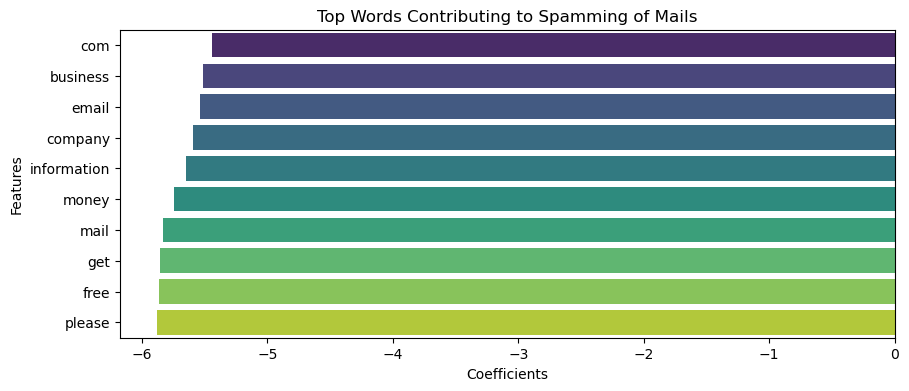

In [782]:
features = vectorizer.get_feature_names_out()
coeff = nb_model.feature_log_prob_[1]

# Create a dataframe for feature importance
feature_imp_df = pd.DataFrame({'Features': features, 'Coefficients': coeff})
top_features = feature_imp_df.sort_values(by='Coefficients', ascending=False).head(10)

plt.figure(figsize=(10,4))
sns.barplot(x='Coefficients', y='Features', data=top_features, palette='viridis')
plt.title('Top Words Contributing to Spamming of Mails')
plt.show()

In [783]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       858
           1       0.98      0.99      0.98       288

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



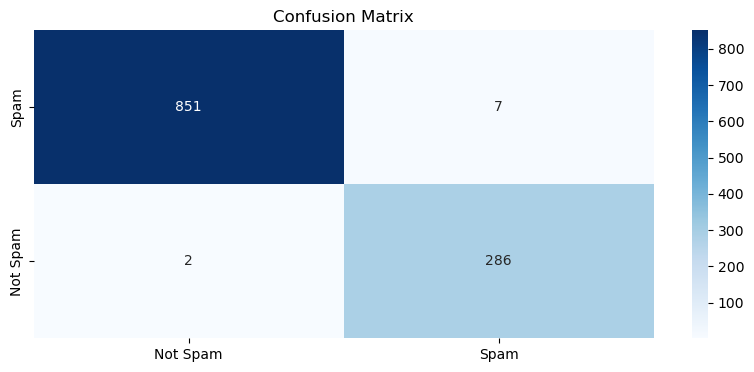

In [784]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,4),dpi=100)
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Spam','Not Spam'])
plt.title('Confusion Matrix')
plt.show()

In [785]:
# Model Evaluation (Accuracy, Precision and Recall)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Accuracy of the model is :',accuracy * 100,'%')
print('Precision of the model is:', precision)
print('Recall of the model is   :', recall)

Accuracy of the model is : 99.21465968586386 %
Precision of the model is: 0.9761092150170648
Recall of the model is   : 0.9930555555555556


Overall the best algorithm to apply to build a spam filter is the Multinomial Naive Bayes classifier with the accuracy of 99.65%.